# Question 2: How can a Feedforward Neural Network be used to classify celestial objects (Stars, Galaxies, and Quasars)

## Introduction

### Overview

In this notebook I will explain how to use a Feedforward Neural Network to classify different classes within a dataset. I am using the same dataset as Question 1: SDSS DR14.

### What is a Feedforward Neural Network?

A Feedforward Neural Network (FNN) is one of the simplest and most fundamental types of Neural Networks (NN). An FNN consists of three main types of layers:

- Input Layer:
    - This is where the data enters the network, typically represented by the raw input data such as numerical values, features extracted from images, or encoded categorical data
- Hidden Layers:
    - These intermediate layers are where computations and transformations occur
    - A typical FNN might have two or three hidden layers, with each layer containing several interconnected nodes
    - Activation Functions: 
        - Non-linear activation functions, such as ReLU (Rectified Linear Unit), Sigmoid, or Tanh, are applied between layers to introduce non-linearity, enabling the network to learn complex relationships
        - Without these activation functions, the network could only model linear relationships, limiting its effectiveness
- Output Layer:
    - The final layer produces the network's result, such as a classification label or a numerical prediction
    - The structure of the output layer depends on the problem type; classification problems often use a softmax activation function for probabilities, while regression problems might use a linear output

### How do FNNs work?

Unlike more complex architectures, FNNs are characterised by their unidirectional flow of information. Data travels through the network in a single direction: from the input layer, through the hidden layers, and finally to the output layer. Having no loops simplifies both the understanding and implementation of FNNs.

In a standard FNN, every node in one layer is fully connected to every node in the next layer. These connections are weighted, meaning the network learns which features are most relevant to the task by adjusting these weights during training.

### How does Training work?

FNNs are typically trained using supervised learning, where the network is provided with input data and corresponding labels. Throughout the training the error between the network's predictions and the actual labels is minimised. This is done through backpropagation, an algorithm that calculates the gradient of the error with respect to the network's weights. The weights are then updated using optimisation techniques, such as gradient descent or its variants (e.g., Adam, RMSprop).

During training the dataset is usually divided into three subsets:

- Training Set:
    - Used to train the model
- Validation Set:
    - Used to tune hyperparameters and monitor performance during training
- Test Set:
    - Used to evaluate the model's performance on unseen data

### Pros and Cons of FNNs

Pros:
- Simplicity:
    - FNNs have a straightforward structure with a unidirectional flow of data, making them easier to understand and implement compared to other neural network architectures
- Versatility:
    - They can be applied to a wide range of problems, including classification, regression, and basic pattern recognition tasks
- Efficient for Small Datasets:
    - FNNs are effective when the dataset is not extremely large or complex, as they don't require the advanced mechanisms of more sophisticated architectures
- Deterministic Flow:
    - Data flows in a predictable manner, which simplifies debugging and analysis of the network's behavior
- Non-linearity:
    - Activation functions in FNNs enable them to model non-linear relationships, making them capable of learning complex patterns
- Fully Connected Architecture:
    - Every node in one layer connects to every node in the next, ensuring all features have a chance to contribute to the output

Cons:
- Computationally Intensive:
    - The fully connected architecture requires a large number of parameters to train, leading to higher computational costs for large networks
- Lack of Temporal Awareness:
    - FNNs are unsuitable for sequential or time-series data (e.g., speech or stock prices), as they lack memory or mechanisms to retain information about past inputs
- Prone to Overfitting:
    - With a large number of parameters and limited data, FNNs can easily overfit the training set, reducing generalisation to unseen data
- Scalability Issues:
    - As the size of the input or the problem complexity increases, the number of required neurons and layers grows significantly, making training and inference slower
- Data Dependency:
    - They require well-preprocessed and labeled data for effective learning, which can be time-consuming and resource-intensive
- Not Modular:
    - Unlike architectures like convolutional neural networks (CNNs), which are designed to efficiently handle structured data (e.g., images), FNNs treat all inputs equally, making them less efficient for specific types of tasks
- Vulnerability to Vanishing Gradients:
    - Deep FNNs can suffer from vanishing gradient problems during training, especially with activation functions like Sigmoid or Tanh

## Imports

These are the modules that will be needed in order to create and understand our NN.

In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

## Initialising the Dataset

As with the Q1 notebook, we need to load the data into the notebook. To do this we will use pandas' [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [2]:
# change the path to where the csv file is stored on your pc
path = "/path/to/dataset/SDSS.csv"
data = pd.read_csv(path)
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


We are going to use the same features as in Question 1. For an explanation as to why we make these choices, refer to that notebook or the README.

In [3]:
features = data[['u', 'g', 'r', 'i', 'z']]
labels = data['class']
features

,u,g,r,i,z
0,19.47406,17.04240,15.94699,15.50342,15.22531
1,18.66280,17.21449,16.67637,16.48922,16.39150
2,19.38298,18.19169,17.47428,17.08732,16.80125
3,17.76536,16.60272,16.16116,15.98233,15.90438
4,17.55025,16.26342,16.43869,16.55492,16.61326
...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570
9996,18.27255,17.43849,17.07692,16.71661,16.69897
9997,18.75818,17.77784,17.51872,17.43302,17.42048
9998,18.88287,17.91068,17.53152,17.36284,17.13988


Once we have the data we can start preprocessing on the features that we're going to use.

## Data Preprocessing

As in Question 1 with the decision tree, we need to split the data between training and testing. However, now we're also going to split out a validation set. Where the training set is used to train the model, and the testing set is used to measure the model's performance, the validation set will be used to tune hyperparameters (e.g., learning rate, architecture) and monitor overfitting during training.

A validation set isn't needed for a traditional approach like a decision tree, but is useful for a NN for a few reasons:
- Hyperparameter Tuning:
    - NNs have many hyperparameters (e.g., learning rate, number of layers, units per layer, dropout rate, etc.)
    - These hyperparameters significantly affect the model's performance and need to be tuned carefully
    - A validation set is essential for assessing how well different hyperparameter configurations generalise to unseen data, guiding the selection of the best combination
- Overfitting and Regularisation:
    - NNs are highly flexible and prone to overfitting, especially when they have many parameters relative to the size of the dataset
    - Validation sets help monitor overfitting during training (e.g., by stopping early when validation loss stops improving) and determine the effectiveness of regularisation techniques such as dropout or weight decay
- Iterative Training:
    - NNs are trained iteratively over multiple epochs, and their performance changes dynamically during training
    - A validation set is necessary to monitor this performance over time and decide when to stop training (e.g., early stopping to avoid overfitting)
- Model Complexity:
    - NNs can represent highly complex functions, making them more prone to capturing noise in the training data
    - A validation set is critical for estimating generalisation performance and ensuring the model does not memorise the training data
- Optimisation Algorithms:
    - NNs rely on gradient-based optimisation, which can be sensitive to the choice of learning rate and other settings
    - The validation set helps evaluate how well the optimisation process generalises to unseen data

We use the [train_test_split](https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.train_test_split.html) function to split the data.

In [4]:
# Split the data into training, verification, and testing sets
    # train_test_split() splits the data into training and testing sets
    # test_size=0.2 specifies that 20% of the data should be used for testing
    # random_state=42 is a random seed used to shuffle the data
    # The data is split into training and validation sets in a 80:20 ratio
    # The training set is then split into training and validation sets in a 80:20 ratio
    # The final data is split into training, validation, and testing sets in a 64:16:20 ratio
features_train_val, features_test, label_train_val, label_test = train_test_split(features, labels, test_size=0.2, random_state=42)
features_train, features_val, label_train, label_val = train_test_split(features_train_val, label_train_val, test_size=0.2, random_state=42)

In order to train a NN we need to get the data into the right format to work with. The first step is to normalise all the data. NNs often perform better with normalised data because they are sensitive to the scale of the input features. Standardisation ensures that features with larger ranges don’t dominate, and makes the model converge faster.

These next few steps can be done before splitting, however there are a few benefits to splitting the data first:
- Avoiding Data Leakage:
    - If we apply encoding or scaling to the entire dataset before splitting, information from the validation and test sets "leaks" into the transformations applied to the training set
    - This can result in an artificially inflated model performance since the preprocessing step has already seen information from unseen data
    - By splitting first, the encoder and scaler are fitted only on the training set, which ensures that the transformations applied to the validation and test sets are based solely on the training data
- Real-World Emulation:
    - In a real-world deployment, the model will encounter unseen data and must preprocess it using transformations derived from the training set
    - Splitting first mimics this scenario, as the encoder and scaler applied to validation and test data are based on the training set alone
- Preventing Overfitting:
    - If the entire dataset is scaled or encoded together, the model might "learn" patterns that exist across the entire dataset but do not generalise to unseen data
    - Splitting first ensures that the model cannot rely on preprocessed patterns from the validation and test sets, reducing the risk of overfitting
- Ensuring Reproducibility:
    - When splitting first, a clear distinction between the training and evaluation phases is maintained
    - This makes it easier to reproduce results and understand the source of any discrepancies in model performance

We will use the [StandardScaler](https://scikit-learn.org/1.6/modules/generated/sklearn.preprocessing.StandardScaler.html) class from scikit-learn to normalise the data.

In [5]:
# Initiliase the StandardScaler() function
    # It's important to initialise the StandardScaler() function, then use it for all the data sets to ensure that the same scaling is applied to all the data sets
    # The StandardScaler() function scales the data so that it has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Fit the StandardScaler() function to the training data
    # The fit_transform() function fits the StandardScaler() function to the training data and then scales the training data
    # The transform() function scales the validation and testing data using the same scaling as the training data
    # This ensures that the validation and testing data are scaled in the same way as the training data
features_train_normalised = scaler.fit_transform(features_train)
features_val_normalised = scaler.transform(features_val)
features_test_normalised = scaler.transform(features_test) 

We also need to convert the label names (Star, Galaxy, QSO) into numbers as NNs expect numerical inputs and outputs. This is done using the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class.

In [6]:
# Encode the labels using the LabelEncoder() function
    # Again, it's important to initialise the LabelEncoder() function, then use it for all the data sets to ensure that the same encoding is applied to all the data sets
    # The LabelEncoder() function encodes the labels, in alphabetical order, as integers starting from 0 (e.g. Galaxy is 0, QSO is 1, Star is 2)
    # This is necessary because the labels need to be integers for the model to be able to use them
label_encoder = LabelEncoder()

# Fit the LabelEncoder() function to the training labels
    # The fit_transform() function fits the LabelEncoder() function to the training labels and then encodes the training labels
    # The transform() function encodes the validation and testing labels using the same encoding as the training labels
    # This ensures that the validation and testing labels are encoded in the same way as the training labels
label_train_encoded = label_encoder.fit_transform(label_train)
label_val_encoded = label_encoder.transform(label_val)
label_test_encoded = label_encoder.transform(label_test)

We then want to store the datasets as PyTorch tensors, which are similar to NumPy arrays but have some unique features that make them more suitable for machine learning tasks.

- Multi-Dimensional Arrays:
    - Tensors can have any number of dimensions, making them versatile for representing various types of data, such as scalars (0D), vectors (1D), matrices (2D), and higher-dimensional arrays
- GPU Acceleration:
    - PyTorch tensors can be moved to and operated on using GPUs, which significantly speeds up computations, especially for large-scale machine learning models
- Automatic Differentiation:
    - PyTorch tensors support automatic differentiation, which is essential for training NNs. This feature is provided by PyTorch's autograd module, which automatically computes gradients for tensor operations
- Interoperability with NumPy:
    - PyTorch tensors can be easily converted to and from NumPy arrays, allowing seamless integration with existing NumPy-based code

In order to convert the data into tensor form, we will use PyTorch's built-in [tensor](https://pytorch.org/docs/stable/tensors.html) function.

In [7]:
# Convert features and labels into PyTorch tensors
    # torch.tensor() creates a tensor from a NumPy array
    # dtype=torch.float32 and dtype=torch.long specify the data type of the tensor
features_train_tensor = torch.tensor(features_train_normalised, dtype=torch.float32)
features_val_tensor = torch.tensor(features_val_normalised, dtype=torch.float32)
features_test_tensor = torch.tensor(features_test_normalised, dtype=torch.float32)
label_train_tensor = torch.tensor(label_train_encoded, dtype=torch.long)
label_val_tensor = torch.tensor(label_val_encoded, dtype=torch.long)
label_test_tensor = torch.tensor(label_test_encoded, dtype=torch.long)

The final preprocessing step we need to complete, is to create dataloaders for the train, validation, and test sets.

- Dataset:
    - We wrap both the feature and label tensor for the training, validation, and testing sets together into a Dataset object
    - Treating the tensors as a dataset likes this allows us to make a Dataloader

- Dataloader:
    - Dataloaders provide an efficient way to iterate over a dataset
    - They are designed to handle batching, shuffling and parallel data loading, making it easier to feed data into a model during training and evaluation
    - Batching divides the dataset into small subsets that are processed sequentially, which is more efficient than processing them one at a time
    - Shuffling the data introduces randomness, and improves the generalisation of the model by ensuring the model doesn't just learn the order of the data
    - Parallel data loading speeds the data loading process up by running multiple worker processes at once

To add the tensors into a dataset we use the [TensorDataset](https://pytorch.org/cppdocs/api/structtorch_1_1data_1_1datasets_1_1_tensor_dataset.html) structure, and to create a dataloader we use the [Dataloader](https://pytorch.org/docs/stable/data.html) class.

In [8]:
# Create a Dataset for the training, validation, and testing sets
    # torch.utils.data.TensorDataset() creates a dataset from the tensors
    # A dataset is a collection of features and labels
    # The dataset is used to create a DataLoader
train_dataset = torch.utils.data.TensorDataset(features_train_tensor, label_train_tensor)
val_dataset = torch.utils.data.TensorDataset(features_val_tensor, label_val_tensor)
test_dataset = torch.utils.data.TensorDataset(features_test_tensor, label_test_tensor)

# Create a DataLoader for the training, validation, and testing sets
    # torch.utils.data.DataLoader() creates a DataLoader from the dataset
    # A DataLoader is an iterable that provides batches of data
    # batch_size=32 specifies that each batch should contain 32 samples, can be finetuned
    # shuffle specifies whether the data should be shuffled or not
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

## Defining the Neural Network

Now that we have the data ready, we can define the actual NN.

In [9]:
class SDSSClassifier(nn.Module):
    '''
    This class defines the NN model for the classification task. The NN model consists of three fully connected 
        layers with ReLU activation functions and a softmax activation function at the output layer. The NN model is defined in
        the __init__() function and the forward pass is defined in the forward() function.
    '''
    def __init__(self, input_size, hidden_size, num_classes):
        '''
        This function initialises the SDSSClassifier class

        :param input_size: The number of input features, e.g. 5 for [u, g, r, i, z]
        :param hidden_size: The number of neurons in the hidden layer
        :param num_classes: The number of output classes, e.g. 3 for [Galaxy, QSO, and Star]
        '''
        # The super() function is used to call the __init__() function of the parent class (nn.Module)
        super(SDSSClassifier, self).__init__()

        # Define the layers of the NN
            # nn.Linear() defines a fully connected layer
                # The first argument is the number of input neurons
                # The second argument is the number of output neurons
        self.fc1 = nn.Linear(input_size, hidden_size) # First fully connected layer
        self.relu = nn.ReLU() # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Second fully connected layer
        self.fc3 = nn.Linear(hidden_size, num_classes) # Third fully connected layer
        self.softmax = nn.Softmax(dim=1) # Softmax activation function

    def forward(self, input_features):
        '''
        This function defines the forward pass of the NN model and is called when the NN model is run. The forward
            pass is the process of inputting the input features into the NN and obtaining an output.

        :param input_features: The input features
        :return: The output of the NN (the class probabilities)
        '''
        input_features = self.fc1(input_features) # Pass the input features through the first fully connected layer
        input_features = self.relu(input_features) # Pass the output of the first fully connected layer through the ReLU activation function
        input_features = self.fc2(input_features) # Pass the output of the ReLU activation function through the second fully connected layer
        input_features = self.relu(input_features) # Pass the output of the second fully connected layer through the ReLU activation function
        input_features = self.fc3(input_features) # Pass the output of the ReLU activation function through the third fully connected layer
        return self.softmax(input_features) # Apply the softmax activation function to the output of the third fully connected layer and return the result

The first thing the SDSSClassifier class does is inherit from PyTorch's [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) class, which is the base class for all NN models in PyTorch. This inheritance provides the necessary structure and methods to define and train a NN.

It then sets up the layers required by the NN:

- The Input Layer:
    - The input layer is the first layer of the NN and has the same number of neurons as the number of input features
    - It isn't explicitly defined in the SDSSClassifier class because it's simply the input data
- First Fully Connected Layer:
    - The first hidden layer of the NN
    - Tranforms the input data and outputs it to the ReLu activation function
    - Transformation is linear: output = input * weight matrix * bias vector
        - Weight matrix and bias vector are learned during the training
- Rectified Linear Unit (ReLU) Activation Function:
    - The ReLU activation function is applied to the output of the first fully connected layer
    - Introduces non-linearity into the NN by setting any negative inputs to zero
- Second Fully Connected Layer:
    - Takes the output from the ReLU function as an input and performs another linear transformation
- Third Fully Connected Layer:
    - Takes the output from the second layer and outputs to the Log Softmax activation function
- Log Softmax Activation Function:
    - Ensures all inputs are between 0 and 1, and that they sum to 1
    - This essentially computes probabilities

Next it defines the forward() method, which specifies how the data flows through the NN. The forward() method takes the input data as a tensor, then passes it to the first connected layer. The linear output is then passed through the ReLU activation function to help the NN learn complex relationship in the data. The tensor is then passed into the second connected layer, the third, and finally the softmax activation function where log probabilities are calculated.

- Documentation pages for functions and classes used in this model for extra information:
    - [Super](https://docs.python.org/3/library/functions.html#super)
    - [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
    - [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
    - [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)

## Initialising the Model

Now that the NN has been defined, we can start to initialise it. The input, hidden, and output sizes are defined and then fed into the SDSSClassifier class to create the model.

In [10]:
# Define the NN model, loss function, and optimiser
# Input size is the number of input features (e.g., 5 for u, g, r, i, z) we will use
input_size = features_train_tensor.shape[1]

# Hidden size is the number of neurons in the hidden layer
hidden_size = 64  # You can change this value to see how it affects the performance of the model

# Output size is the number of classes (e.g., 3 for star, galaxy, quasar)
    # The number of classes is the number of unique labels in the training data
    # The np.unique() function returns the unique elements in an array, in this case the unique labels in the training data
num_classes = len(np.unique(label_train_tensor))

# Create an instance of the SDSSClassifier class
model = SDSSClassifier(input_size, hidden_size, num_classes)

## Set up the Loss Function and Optimiser

Next we define the loss function and optimiser.

- Loss function:
    - Used to calculate the error between the predicted output of the NN and the actual labels
    - A hyperparameter that needs to be tuned to achieve the best performance of the model
- Optmiser:
    - Used to update the weights of the NN based on the error calculated by the loss function
    - There are many different optimisers available in PyTorch, such as Adam, SGD, RMSprop, etc. We use Adam in this example because it is a popular choice for many tasks, and commonly used for NNs
    - The Adam optimiser is an adaptive learning rate optimiser that adjusts the learning rate during training, which can help the model converge faster and achieve better performance

The loss function and optimiser are defined outside the NN model class because they are not part of the NN architecture, but are instead used to train the NN. This also allows them to be easily changed or modified without affecting the NN architecture.

- Learning rate:
    - The learning rate controls how much the weights of the NN are updated during training
    - A higher learning rate means the weights are updated more and a smaller learning rate means the weights are updated less, during the training.
    - If the learning rate is too high, the model may converge too quickly or diverge as it overshoots the minimum of the loss function
    - If the learning rate is too low, the training process can get stuck in a local minimum and/or take a very long time to complete

In [11]:
# Define the loss function
    # nn.CrossEntropyLoss() is the loss function used for classification tasks with multiple classes
    # The CrossEntropyLoss() function combines the softmax activation function and the negative log likelihood loss function
criterion = nn.CrossEntropyLoss()

# Define the optimiser
    # optim.Adam() is the optimiser used to update the weights of the NN
    # The Adam optimiser is an extension of the stochastic gradient descent optimiser
    # The Adam optimiser adapts the learning rate for each parameter during training
    # The learning rate is specified by the lr argument, which is set to 0.001 (can be finetuned)
    # The model.parameters() function specifies the parameters that need to be updated by the optimiser, which in this case are the weights of the NN
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the Model

Now we are ready to train the model.

First we define the number of epochs used for training. This is the number of times the entire training dataset is passed through completely. I have chosen to use 20 epochs, this number can be changed but having too many epochs can cause the training to take a long time and potentially cause overfitting.

I also create two empty lists that will store the calculated loss values so we can plot them later.

In [12]:
# Set number of epochs for training
num_epochs = 20

# Initialise lists to store training and validation loss history
train_loss_history, val_loss_history = [], []

Each epoch of the training follows these steps:

- Training Setup:
    - The model is put in training mode (.train() is built into the nn.Module class)
    - A variable representing the total loss for this current epoch is set to 0
- Iterating over train_loader:
    - The data is processed in batches (this is why we made the dataloaders)
        - For each batch, the model will compute its predictions based on its current weights
        - Each batch contains the features (u, g, r, i, z) and the corresponding labels
    - The gradients are cleared to zero so that previous epochs don't affect the current gradient
    - The forward pass of the model is then started, and the inputs are sent through the layers of the NN
    - The loss (difference between the predicted labels and the true labels) is calculated
    - The backward pass starts
        - This is where the gradients of the loss with respect to the model's different weights is calculated
        - It uses backpropegation to figure out how each parameter contributed to the loss value, so that they can be adjusted to minimise the loss
    - The optimiser is then used to update the model's parameters based on the calculated gradient
    - The loss is added to the total loss for the current epoch
- Calculate and print the loss:
    - The average loss for this epoch is calculated and stored to the history for later

These steps are then repeated for the evaluation phase except for the gradient calculation, as it isn't necessary to update the model parameters during this phase.

Once both phases are complete, the loss for both training and validation are printed.

- Documentation pages for functions and classes used in this model for extra information:
    - [train()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.train)
    - [zero_grad()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html#torch.optim.Optimizer.zero_grad)
    - [backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)
    - [step()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html)
    - [item()](https://pytorch.org/docs/stable/generated/torch.Tensor.item.html)
    - [eval()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval)

In [13]:
# Train the model for the specified number of epochs
for epoch in range(num_epochs):
    # Enable training mode for the model (some layers may have different behaviour during training and evaluation)
    model.train()

    # Set running loss to 0 for each epoch
    running_loss = 0.0
    
    # Iterate over the training data
    for inputs, labels in train_loader:
        # Zero the gradient buffers
            # It's necessary to zero the gradient buffers before the backward pass to prevent gradient accumulation
        optimizer.zero_grad()
        
        # Forward pass
            # The inputs (features) are passed through the model to obtain the outputs
            # The outputs are the class probabilities for each sample
        outputs = model(inputs)
        
        # Compute the loss
            # The loss is computed by comparing the outputs (class probabilities) to the labels (true classes)
        loss = criterion(outputs, labels)
        
        # Backward pass (compute gradients)
            # The backward() function computes the gradients of the loss with respect to the model parameters
            # The gradients are used to update the weights of the model
        loss.backward()
        
        # Update model parameters
            # The step() function updates the weights of the model using the gradients computed in the backward pass
            # The optimizer uses the gradients to update the weights according to the optimisation algorithm (Adam in this case)
        optimizer.step()
        
        # Accumulate loss
            # The loss.item() function returns the loss as a scalar value
            # The loss is accumulated for each batch to calculate the average loss for the epoch
        running_loss += loss.item()
    
    # Calculate average loss for the epoch
        # The average loss is calculated by dividing the accumulated loss by the number of batches
    train_loss = running_loss / len(train_loader)
    train_loss_history.append(train_loss)



    # Enable evaluation mode for the model
    model.eval()

    # Set validation loss to 0 for each epoch
    val_loss = 0.0

    # Disable gradient calculation during validation
        # It's not necessary to calculate gradients during validation
        # The no_grad() context manager is used to disable gradient calculation
        # Disabling gradient calculation reduces memory consumption and speeds up the computations
    with torch.no_grad():
        # Iterate over the validation data
        for inputs, labels in val_loader:
            # Forward pass
                # The inputs (features) are passed through the model to obtain the outputs
                # The outputs are the class probabilities for each sample
            outputs = model(inputs)

            # Compute the loss
                # The loss is computed by comparing the outputs (class probabilities) to the labels (true classes)
            loss = criterion(outputs, labels)
            
            # Accumulate loss
                # The loss.item() function returns the loss as a scalar value
                # The loss is accumulated for each batch to calculate the average loss for the epoch
            val_loss += loss.item()
    
    # Calculate average loss for the epoch
        # The average loss is calculated by dividing the accumulated loss by the number of batches
    val_loss /= len(val_loader)
    val_loss_history.append(val_loss)

    # Print training and validation loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch [1/20], Train Loss: 0.8639, Val Loss: 0.7588
Epoch [2/20], Train Loss: 0.7276, Val Loss: 0.6738
Epoch [3/20], Train Loss: 0.6586, Val Loss: 0.6413
Epoch [4/20], Train Loss: 0.6380, Val Loss: 0.6300
Epoch [5/20], Train Loss: 0.6294, Val Loss: 0.6246
Epoch [6/20], Train Loss: 0.6270, Val Loss: 0.6227
Epoch [7/20], Train Loss: 0.6235, Val Loss: 0.6196
Epoch [8/20], Train Loss: 0.6221, Val Loss: 0.6253
Epoch [9/20], Train Loss: 0.6196, Val Loss: 0.6171
Epoch [10/20], Train Loss: 0.6179, Val Loss: 0.6168
Epoch [11/20], Train Loss: 0.6154, Val Loss: 0.6118
Epoch [12/20], Train Loss: 0.6143, Val Loss: 0.6124
Epoch [13/20], Train Loss: 0.6147, Val Loss: 0.6148
Epoch [14/20], Train Loss: 0.6126, Val Loss: 0.6152
Epoch [15/20], Train Loss: 0.6109, Val Loss: 0.6069
Epoch [16/20], Train Loss: 0.6099, Val Loss: 0.6075
Epoch [17/20], Train Loss: 0.6087, Val Loss: 0.6110
Epoch [18/20], Train Loss: 0.6076, Val Loss: 0.6063
Epoch [19/20], Train Loss: 0.6080, Val Loss: 0.6052
Epoch [20/20], Train 

## Testing the Model

Now that our model has been trained, we need to test it to see how well it works.

The model is set to evaluation mode and then (without worrying about the gradient) it loops through the model using the same steps as the training but with the test data. This then gives us a set of predictions for what the classes are. By comparing these predictions we can find how accurate the model is.

In [14]:
# Set the model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds, all_labels = [], []

# Predict on the test set
with torch.no_grad():
    # Iterate over the test data
    for inputs, labels in test_loader:
        # Forward pass
            # The inputs (features) are passed through the model to obtain the outputs
            # The outputs are the class probabilities for each sample
        outputs = model(inputs)
        
        # Get predicted class with the highest probability
            # The max() function returns two values: the maximum value and its index
                # We only care about the index, so store the maximum value to _ (a dummy variable)
            # The index of the maximum value is the predicted class
        _, preds = torch.max(outputs, 1)
        
        # Store predictions and true labels
            # The preds and labels tensors are converted to NumPy arrays using the .numpy() function
            # The predicted and true labels are stored in the all_preds and all_labels lists
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

We can use a classification report like in Question 1 to show us the accuracy of the model.

In [15]:
# Print the classification report to 4 decimal places
    # The classification_report() function computes the precision, recall, F1 score, and support for each class
print("Classification Report: \n\n", classification_report(all_labels, all_preds, target_names=label_encoder.classes_, digits=4))

Classification Report: 

               precision    recall  f1-score   support

      GALAXY     0.9575    0.9267    0.9418       996
         QSO     0.9045    0.9474    0.9254       190
        STAR     0.9188    0.9447    0.9316       814

    accuracy                         0.9360      2000
   macro avg     0.9269    0.9396    0.9329      2000
weighted avg     0.9367    0.9360    0.9361      2000



## Plotting the Model

Here we plot the loss curves. The loss should decrease as the epoch increases. This is because the model is converging and becoming better at predicting as training progresses.

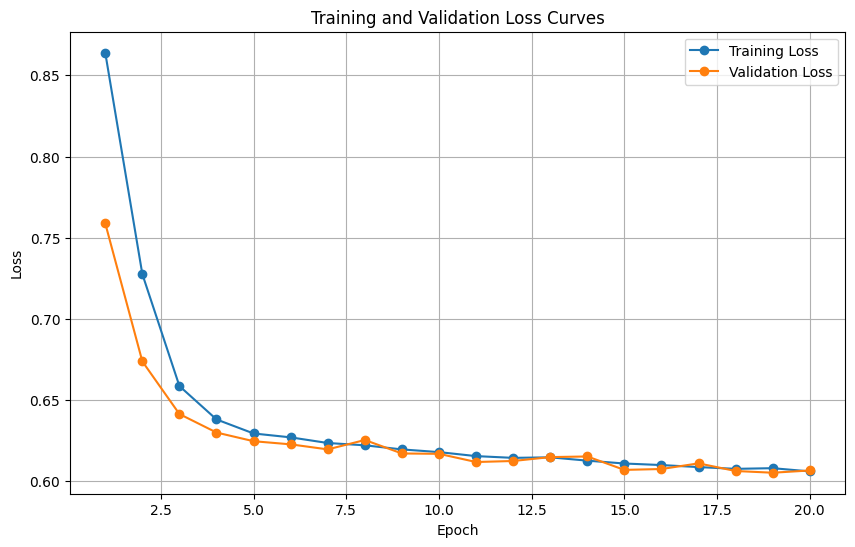

In [16]:
# Plot the training and validation loss curves

# Set the figure size to be 10 inches by 6 inches (width by height), can be adjusted as needed
plt.figure(figsize=(10, 6))

# Plot the training and validation loss curves
plt.plot(range(1, num_epochs + 1), train_loss_history, marker='o', label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, marker='o', label='Validation Loss')

# Add labels to the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a title to the plot, display the legend, and show a grid
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid()
plt.show()


As in Question 1, a confusion matrix is a great way to visualise how well a model performs. I have plotted both a regular and a normalised version below.

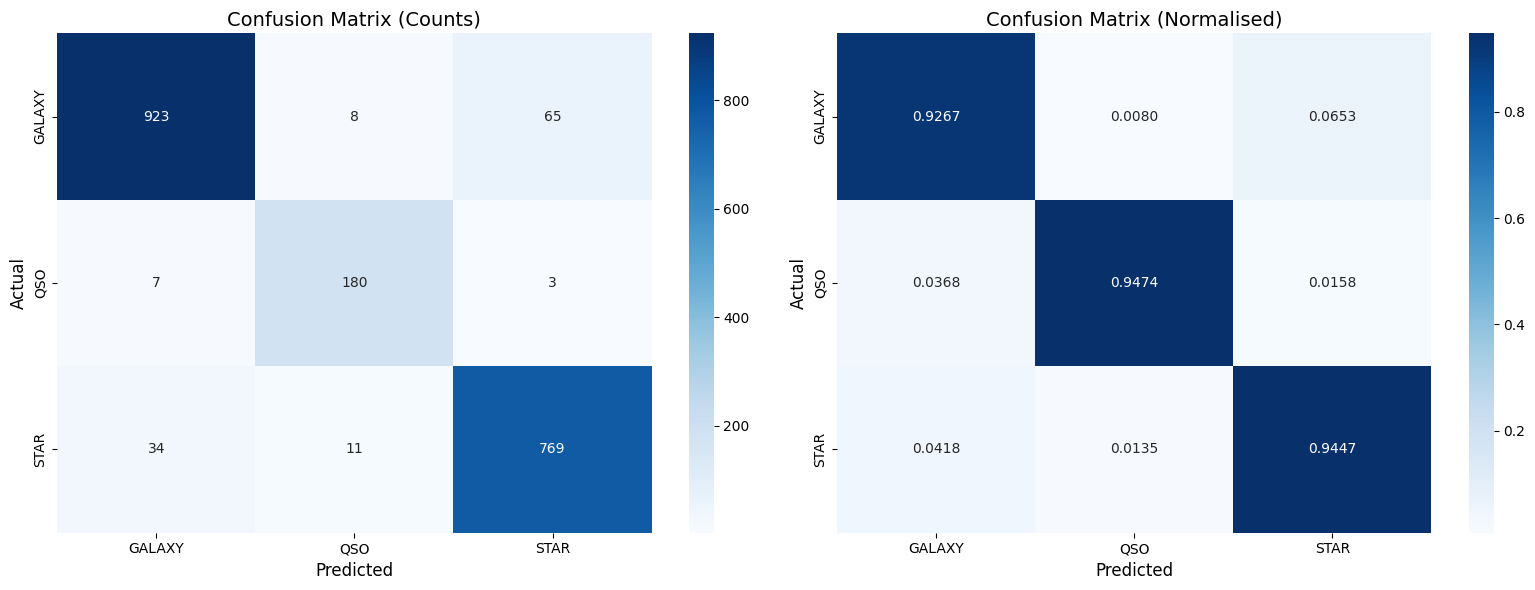

In [17]:
# Calculate the confusion matrix
    # The confusion_matrix() function computes the confusion matrix
    # The confusion matrix is a table that shows the number of true positives, false positives, true negatives, and false negatives
    # The confusion matrix is used to evaluate the performance of a classification model
cm = confusion_matrix(all_labels, all_preds)

# Normalise the confusion matrix
    # Normalising the confusion matrix makes it easier to interpret
    # The normalised confusion matrix shows the proportion of samples that were correctly and incorrectly classified
    # The axis argument specifies the axis along which the normalisation is performed
    # axis=1 normalises the confusion matrix by the true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure with two subplots: one for the unnormalised confusion matrix, one for the normalised one
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the unnormalised confusion matrix
    # The heatmap() function creates a heatmap of the confusion matrix
    # The annot=True argument displays the counts in each cell of the heatmap
    # The fmt='d' argument formats the counts as integers
    # The cmap='Blues' argument sets the colour map to 'Blues'
    # The xticklabels and yticklabels arguments set the labels for the x and y axes
    # The ax argument specifies the subplot to use for the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=axes[0])

# Plot the normalised confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.4f', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=axes[1])

# Set the titles and labels for the plots
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)

axes[1].set_title('Confusion Matrix (Normalised)', fontsize=14)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

## Comparison with a Traditional Method (Decision Tree)

In Question 1, we looked at how to classify the same dataset using a non NN approach, a Decision Tree. Both methods were very succesful, but how do they compare?
- Decision Tree:
    - Simple and easy to both visualise and understand
    - Faster to train than FNN
    - Is less accurate than FNN
    - Minimal preproccessing required and don't need to convert labels into numerical values
    - Can handle non-linear relationships with a more complex tree structure, although prone to overfitting with a greater depth
    - Each decision path can be graphically shown and traced back to understand the classification, although if the depth is great this can become very convoluted and messy to display
- Feedforward Neural Network:
    - Better at modelling complex non-linear relationships
    - More flexible with options to avoid overfitting and add optimisations to the model
    - Requires a lot of preprocessing
    - More computationally intensive
    - Several percentage points more accurate across the board

The Feedforward Neural Network (FNN) is more accurate across the board than the Decision Tree (DT), with an overall accuracy of 93.90% vs 90.10% or the DT. However, this accuracy comes at the cost of being more computational intensive and requiring far more preprocessing. The FNN needs the input data to be normalised and processed into tensor dataloaders and the labels need to be numerical values, whereas the DT can accept the data straight from a pandas dataframe without any changes. This combined with the fact that the DT is not only simpler to code, but also to understand and visualise, makes it superior for this specific classification task.